# Goal: Create the correlation matrix

This cell is for importing necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq # for minimum spanning tree

This cell is for reading the data file.

In [2]:
PSE_data = pd.read_csv(
    "C:\\Users\\Donna\\OneDrive - ASIAN INSTITUTE OF MANAGEMENT\\(A) PAPER\\AA Code\\PSE Stocks Data\\daily.csv"
)
PSE_data['date_id'] = pd.to_datetime(PSE_data['date_id'])
PSE_data = PSE_data.set_index("date_id")
df_filtered = PSE_data.drop(columns=[col for col in PSE_data.columns if not (col.startswith('PH_') and col.endswith('_P')) and col != 'date_id'])

This code is for removing the other rows that are not within the last 10 years of the data. I also used the date September 25, 2013 as the start date so that when I calculate log returns, I will have exactly 10 years worth of data. 

In [3]:
df_filtered = df_filtered.loc['2013-09-25':'2023-09-26']

## Cleaning data
This block is for cleaning the data and removing columns with too many null values.

In [4]:
def has_high_null_percentage(column, null_threshold):
    return column.isnull().mean() > null_threshold

# def has_consecutive_constant_values(column, threshold):
#     constant_streak = column.groupby((column != column.shift()).cumsum()).transform('size')
#     return constant_streak.max() > threshold

# def has_end_constant_values(column, end_threshold):
#     end_section = column.iloc[-int(len(column) * 0.05):]
#     return end_section.nunique() == 1

# def has_few_variations(column, variation_threshold):
#     return column.nunique() < variation_threshold

null_percentage_threshold = round(df_filtered.shape[0] * 0.85)
# consecutive_constant_threshold = int(len(df_filtered) * 0.35) 
# end_constant_threshold = 0.01
# variation_threshold = 50

columns_to_drop = []

for col in df_filtered.columns:
    if col == "date_id":  
        continue
    
    if (
        has_high_null_percentage(df_filtered[col], null_percentage_threshold) # or
        # has_consecutive_constant_values(df_filtered[col], consecutive_constant_threshold) or
        # has_end_constant_values(df_filtered[col], end_constant_threshold) or
        # has_few_variations(df_filtered[col], variation_threshold)
    ):
        columns_to_drop.append(col)

df_filtered = df_filtered.drop(columns=columns_to_drop)

In [5]:
df_filtered

,PH_PIP_P,PH_ASA_P,PH_ABS_P,PH_AGN_P,PH_APC_P,PH_CHP_P,PH_CEU_P,PH_CIR_P,PH_CAA_P,PH_EEQ_P,...,PH_MJC_P,PH_PCK_P,PH_MRP_P,PH_LOT_P,PH_BAG_P,PH_H2O_P,PH_PRC_P,PH_SSN_P,PH_SIN_P,PH_SHK_P
date_id,,,,,,,,,,,,,,,,,,,,,
2013-09-25,NaN,7.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,13.0,5.0,10.0,12.0,0.0,NaN
2013-09-26,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,12.0,6.0,10.0,11.0,0.0,NaN
2013-09-27,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,13.0,5.0,10.0,11.0,0.0,NaN
2013-09-30,NaN,6.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,11.0,6.0,12.0,5.0,10.0,11.0,0.0,NaN
2013-10-01,NaN,7.0,33.0,6.0,1.0,NaN,11.0,12.0,46.0,10.0,...,1.0,6.0,10.0,6.0,13.0,5.0,10.0,11.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,4.0,5.0,1.0,7.0,2.0,1.0,9.0
2023-09-21,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,4.0,5.0,1.0,7.0,2.0,1.0,9.0
2023-09-22,2.0,11.0,3.0,3.0,0.0,1.0,8.0,2.0,44.0,5.0,...,1.0,4.0,7.0,3.0,5.0,1.0,7.0,2.0,1.0,9.0


## Calculate returns from raw prices; log returns are probably easier, but you can try others like standardized returns if you have time

This cell is for calculating log returns.

In [6]:
PSE_log_returns = df_filtered.copy()
numeric_cols = PSE_log_returns.columns.difference(["date_id"])
PSE_log_returns[numeric_cols] = PSE_log_returns[numeric_cols].replace(0, np.nan)
PSE_log_returns[numeric_cols] = np.log(PSE_log_returns[numeric_cols] / PSE_log_returns[numeric_cols].shift(1))

I removed the the row for September 25, 2013, and I filled all the nan values with zero.

In [7]:
PSE_log_returns = PSE_log_returns.loc['2013-09-26':'2023-09-26']
PSE_log_returns.columns = PSE_log_returns.columns.str.replace(r"_P", "").str.replace(r"PH_", "")
least_null_cols = PSE_log_returns.isna().sum().nsmallest(3).index
trial = PSE_log_returns[least_null_cols]
trial

,ASA,ABS,AGN
date_id,,,
2013-09-26,-0.154151,0.0,0.0
2013-09-27,0.000000,0.0,0.0
2013-09-30,0.000000,0.0,0.0
2013-10-01,0.154151,0.0,0.0
2013-10-02,0.000000,0.0,0.0
...,...,...,...
2023-09-20,0.000000,0.0,0.0
2023-09-21,0.000000,0.0,0.0
2023-09-22,0.000000,0.0,0.0


## Finding an appropriate window size and creating a covariance matrix

The cell below is for creating the covariance matrix. I used a window size of 6 months.

In [8]:
# covariance_dict = {}
# window_size = 120

# for col in trial.columns:
#     for other in trial.columns:
#         if col != other:
#             covariances = []
#             A = trial[col].to_numpy()
#             B = trial[other].to_numpy()
            
#             for i in range(len(A) - window_size + 1):
#                 win_A = A[i:i + window_size]
#                 win_B = B[i:i + window_size]
                
#                 covar = np.cov(A, B)
#                 covariances.append(covar[0, 1])
                
#             covariance_dict[f"{col}_{other}"] = covariances

In [9]:
def my_nancov(arr1, arr2):
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)

    mask = ~np.isnan(arr1) & ~np.isnan(arr2)
    arr1_masked = arr1[mask]
    arr2_masked = arr2[mask]

    if len(arr1_masked) < 2: # need at least 2 points
      return np.nan

    return np.cov(np.stack([arr1_masked, arr2_masked], axis=0))[0, 1]

In [10]:
covariance_dict = {}
window_size = 120

for col in trial.columns:
    for other in trial.columns:
        if col != other:
            covariances = []
            A = trial[col].to_numpy()
            B = trial[other].to_numpy()
            
            for i in range(len(A) - window_size + 1):
                win_A = A[i:i + window_size]
                win_B = B[i:i + window_size]
                
                covar = my_nancov(win_A, win_B)
                covariances.append(covar)
                
            covariance_dict[f"{col}_{other}"] = covariances

In [11]:
covar_df = pd.DataFrame(covariance_dict) # .reindex(PSE_log_returns.index)
# covar_df = covar_df.iloc[:-window_size]
covar_df

# covar_matrix = covar_matrix.to_numpy()
# covar_matrix

,ASA_ABS,ASA_AGN,ABS_ASA,ABS_AGN,AGN_ASA,AGN_ABS
0,0.000042,-4.478177e-22,0.000042,0.000097,-4.478177e-22,0.000097
1,0.000044,4.376941e-06,0.000044,0.000096,4.376941e-06,0.000096
2,0.000044,4.376941e-06,0.000044,0.000096,4.376941e-06,0.000096
3,0.000043,4.376941e-06,0.000043,0.000097,4.376941e-06,0.000097
4,0.000042,-4.478177e-22,0.000042,0.000097,-4.478177e-22,0.000097
...,...,...,...,...,...,...
2485,-0.000231,5.655190e-06,-0.000231,0.000149,5.655190e-06,0.000149
2486,-0.000231,5.655190e-06,-0.000231,0.000149,5.655190e-06,0.000149
2487,-0.000231,5.655190e-06,-0.000231,0.000149,5.655190e-06,0.000149
2488,-0.000231,5.655190e-06,-0.000231,0.000149,5.655190e-06,0.000149


### Prof Jose

boolean arrays, less for loops <br>
covariance cant have null values nanstd <br>
masked array<br>
dendrogram <br>

In [12]:
A = np.array([1, 2, 3, 4, 5, 6, np.nan])

In [13]:
print(np.std(A))
print(np.max(A))
print(np.mean(A))

nan
nan
nan


In [14]:
print(np.nanstd(A))
print(np.nanmax(A))
print(np.nanmean(A))

1.707825127659933
6.0
3.5


In [15]:
# masked array
A[A > 3]

array([4., 5., 6.])

In [16]:
A > 3

array([False, False, False,  True,  True,  True, False])

# Goal:  Create the correlation and distance matrices for returns of PSE stocks over different windows and create the Minimum Spanning Tree

## Turn the covariance matrix into correlation matrix. Turn the correlation matrix into a distance matrix. Create the Minimum Spanning Tree. 

In [36]:
"""
# scratch code
def covar_to_correl(cov_matrix):
    # cov_array = cov_matrix.to_numpy() if isinstance(cov_matrix, pd.DataFrame) else cov_matrix
    cov_matrix = cov_matrix.apply(pd.to_numeric, errors='coerce')
    std_devs = np.sqrt(np.diag(cov_matrix))
    
    with np.errstate(invalid='ignore'):
        correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)

    np.fill_diagonal(correlation_matrix.values, 1)
    
    return correlation_matrix

"""

"\n# scratch code\ndef covar_to_correl(cov_matrix):\n    # cov_array = cov_matrix.to_numpy() if isinstance(cov_matrix, pd.DataFrame) else cov_matrix\n    cov_matrix = cov_matrix.apply(pd.to_numeric, errors='coerce')\n    std_devs = np.sqrt(np.diag(cov_matrix))\n    \n    with np.errstate(invalid='ignore'):\n        correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)\n\n    np.fill_diagonal(correlation_matrix.values, 1)\n    \n    return correlation_matrix\n\n"

In [51]:
 # from: https://gist.github.com/wiso/ce2a9919ded228838703c1c7c7dad13b
def covar_to_correl(covariance):
    covariance = covariance.apply(pd.to_numeric, errors="coerce")
    
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    
    correlation = np.where(outer_v == 0, 0, covariance / outer_v)
    np.fill_diagonal(correlation, 1)
    return pd.DataFrame(correlation, index=covariance.index, columns=covariance.columns)

# from: https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/
def prim_mst(distance_matrix 
    n = len(distance_matrix.index) # distance_matrix.shape[0]
    visited = [False] * n
    all_mst_edges = []

    for start_node_index in range(n):
        if visited[start_node_index]:  
            continue 
            
        start_node = distance_matrix.index[start_node_index] 
        min_heap = []
        mst_edges = []
        visited_component = [False] * n
        visited_component[start_node_index] = True
        num_visited = 1

        for i_index in range(n):
            i = distance_matrix.index[i_index]
            if i != start_node and not np.isnan(distance_matrix.loc[start_node, i]):
                heapq.heappush(min_heap, (distance_matrix[start_node, i], start_node, i))

        while min_heap:
            weight, u, v = heapq.heappop(min_heap)
            
            v_index = distance_matrix.index.get_loc(v) 
            if visited_component[v_index]:
                continue

            visited_component[v_index] = True
            num_visited += 1
            mst_edges.append((u, v, weight))

            for w_index in range(n):
                w = distance_matrix.index[w_index] # Get the actual label
                if not visited_component[w_index] and not np.isnan(distance_matrix.loc[v, w]): # Use .loc
                    heapq.heappush(min_heap, (distance_matrix.loc[v, w], v, w))

        if mst_edges:
            all_mst_edges.append(mst_edges)
            
        for j in range(n):
            if visited_component[j]:
                visited[j] = True

    return all_mst_edges

In [50]:
distinct_cols = []

# this is to get all the distinct stocks in the covar_df 
for col in covar_df.columns:
    col = col.split("_")
    for word in col:
        if word not in distinct_cols:
            distinct_cols.append(word)

# this is to make the covar matrix
for i in range(len(covar_df)):
    
    # this is to make the covar matrix
    covar_matrix = pd.DataFrame(index=distinct_cols, columns=distinct_cols)
    
    for col in covar_df.columns:
        parts = col.split("_")
        row = parts[0]
        column = parts[1]

        covariance = covar_df.iloc[i, covar_df.columns.get_loc(col)]
        covar_matrix.loc[row, column] = covariance
        covar_matrix.loc[column, row] = covariance
        
    covar_matrix = covar_matrix.apply(pd.to_numeric, errors='coerce')

    # this is to make the covar matrix into a correl matrix
    correl_matrix = covar_to_correl(covar_matrix)
    
    # this is to make the correl matrix into a distance matrix
    distance_matrix = 1 - np.square(correl_matrix)
    print("Covariance Matrix:\n", covar_matrix)
    print("Correlation Matrix:\n", correl_matrix)
    print("\nDistance Matrix:\n", distance_matrix)
    print("\n\n")

    # this is to create the MST
    all_mst_edges = prim_mst(distance_matrix)

    for i, mst_edges in enumerate(all_mst_edges, 1):
        print(f"\nMST for Component {i}:")
        for u, v, weight in mst_edges:
            print(f"Edge ({u}, {v}) with weight {weight:.6f}")

Covariance Matrix:
               ASA       ABS           AGN
ASA           NaN  0.000042 -4.478177e-22
ABS  4.247541e-05       NaN  9.710517e-05
AGN -4.478177e-22  0.000097           NaN
Correlation Matrix:
      ASA  ABS  AGN
ASA  1.0  NaN  NaN
ABS  NaN  1.0  NaN
AGN  NaN  NaN  1.0

Distance Matrix:
      ASA  ABS  AGN
ASA  0.0  NaN  NaN
ABS  NaN  0.0  NaN
AGN  NaN  NaN  0.0



Covariance Matrix:
           ASA       ABS       AGN
ASA       NaN  0.000044  0.000004
ABS  0.000044       NaN  0.000096
AGN  0.000004  0.000096       NaN
Correlation Matrix:
      ASA  ABS  AGN
ASA  1.0  NaN  NaN
ABS  NaN  1.0  NaN
AGN  NaN  NaN  1.0

Distance Matrix:
      ASA  ABS  AGN
ASA  0.0  NaN  NaN
ABS  NaN  0.0  NaN
AGN  NaN  NaN  0.0



Covariance Matrix:
           ASA       ABS       AGN
ASA       NaN  0.000044  0.000004
ABS  0.000044       NaN  0.000096
AGN  0.000004  0.000096       NaN
Correlation Matrix:
      ASA  ABS  AGN
ASA  1.0  NaN  NaN
ABS  NaN  1.0  NaN
AGN  NaN  NaN  1.0

Distance Mat

In [ ]:
"""
# This does not handle any disconnected MSTs.


def prim_mst(distance_matrix):
    n = distance_matrix.shape[0]
    min_heap = []
    visited = [False] * n
    mst_edges = []
    visited[0] = True
        
    for i in range(1, n):
        if not np.isnan(distance_matrix[0, i]): # to skip nan values
            heapq.heappush(min_heap, (distance_matrix[0, i], 0, i))
    
    while min_heap:
        weight, u, v = heapq.heappop(min_heap)
        
        if visited[v]:
            continue
        
        visited[v] = True
        mst_edges.append((u, v, weight))
        
        for i in range(n):
            if not visited[i] and not np.isnan(distance_matrix[v, i]): # to skip nan values
                heapq.heappush(min_heap, (distance_matrix[v, i], v, i))
    
    return mst_edges

distance_matrix = (distance_matrix + distance_matrix.T) / 2
mst_edges = prim_mst(distance_matrix)
print("Minimum Spanning Tree (MST) edges:")

for u, v, weight in mst_edges:
    print(f"Edge ({u}, {v}) with weight {weight:.6f}")
"""

# Goal: just wanted to see if i could make a heatmap

In [53]:
import seaborn as sns

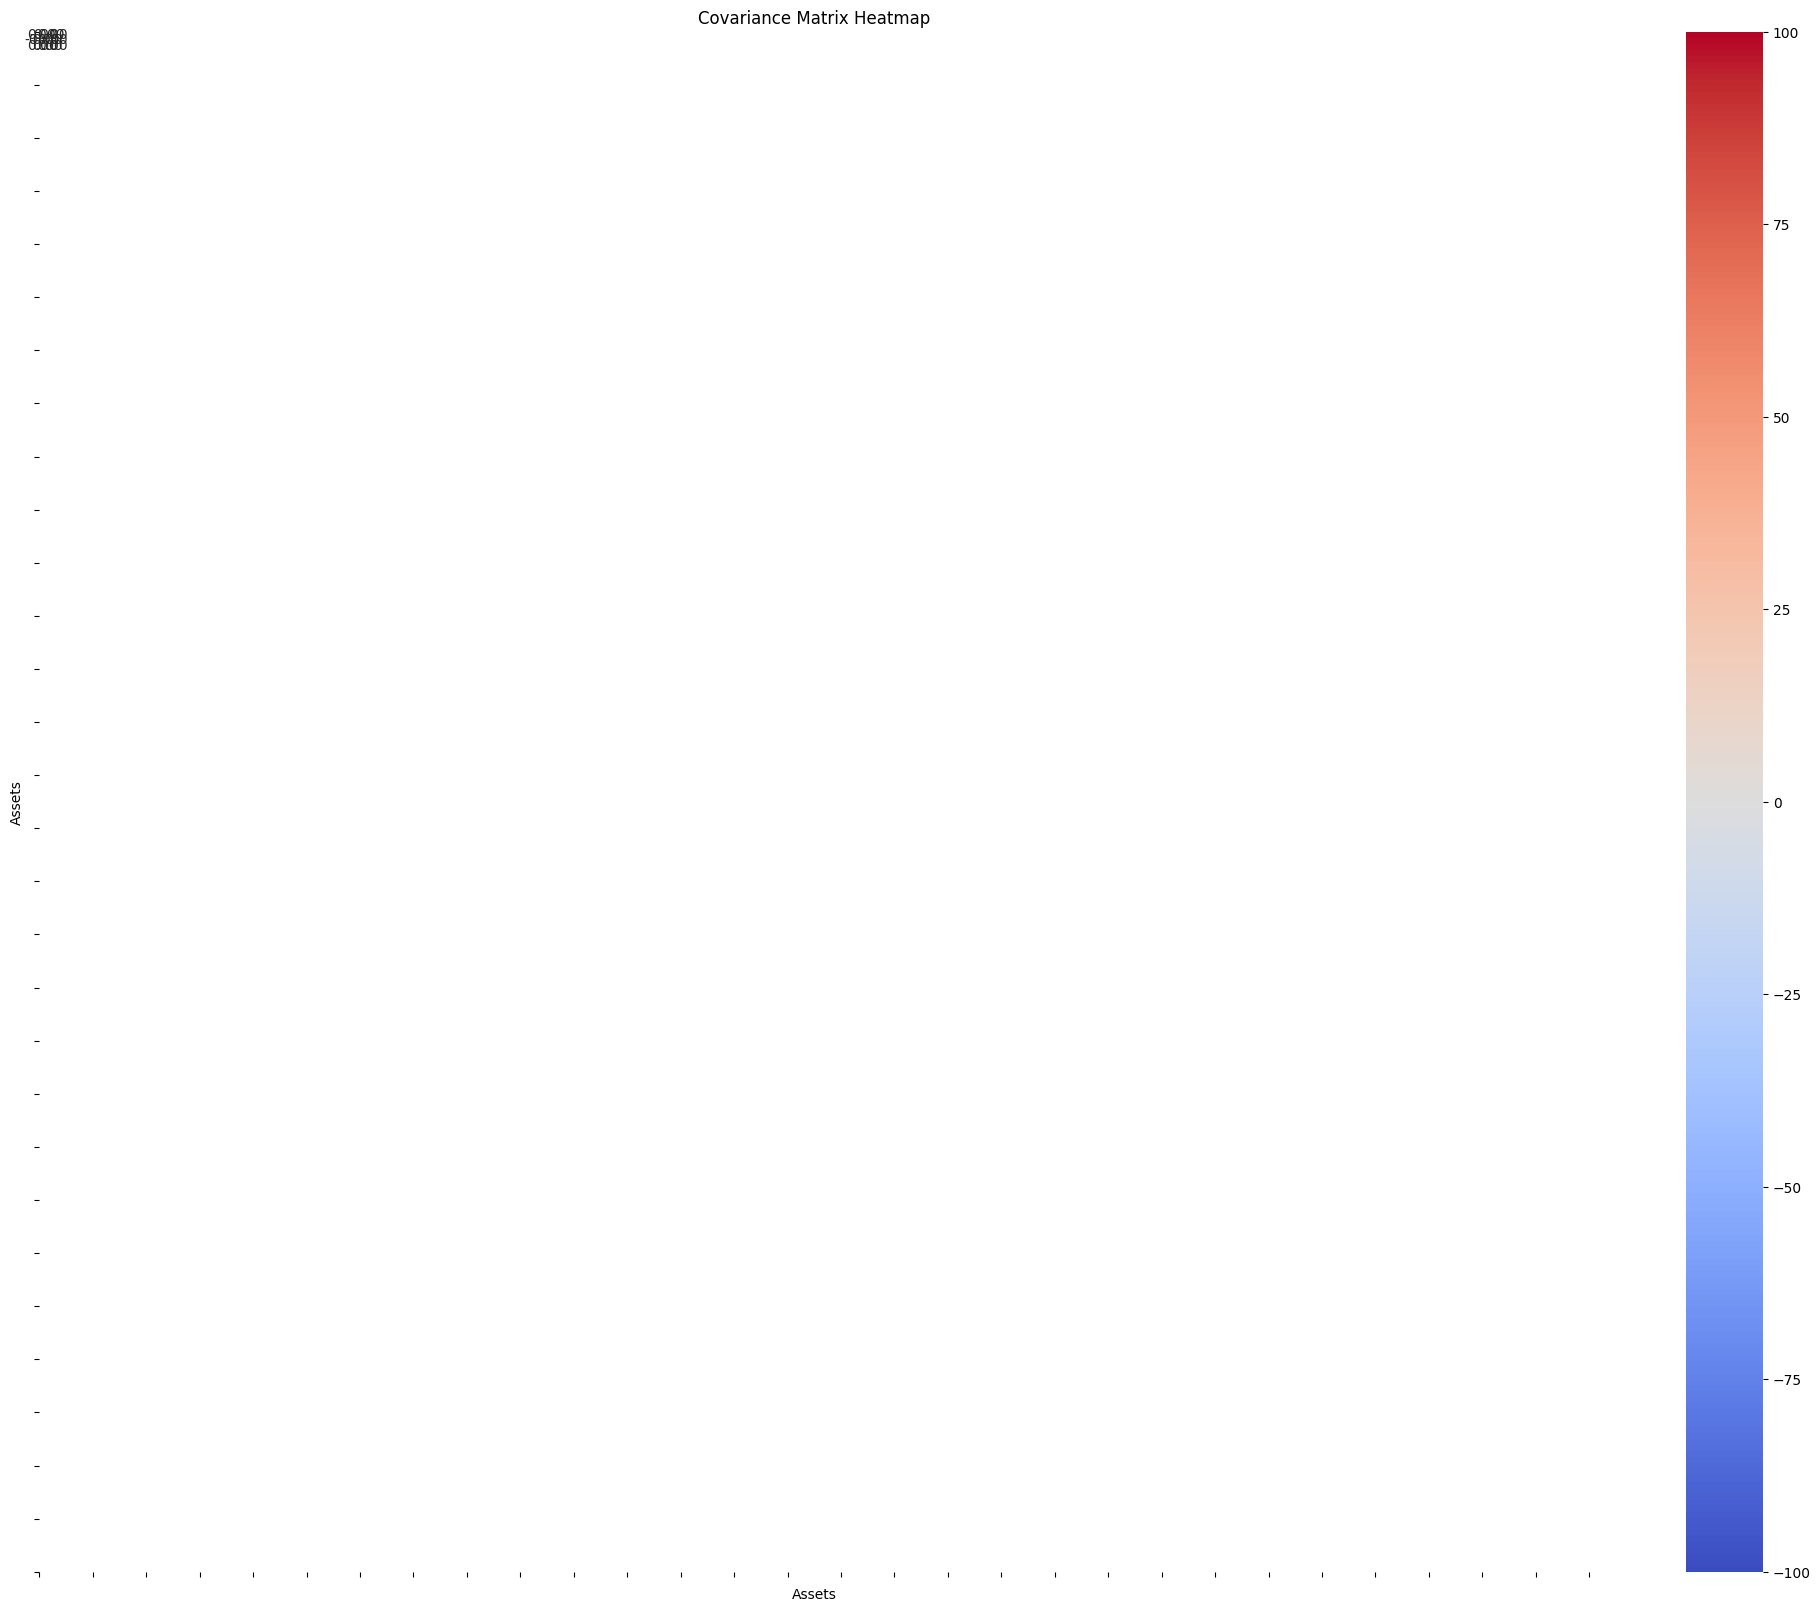

In [54]:
if isinstance(covar_matrix, np.ndarray):
    covar_matrix = pd.DataFrame(covar_matrix, index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

covar_matrix.fillna(0, inplace=True)

plt.figure(figsize=(25, 20))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.005, vmin=-100, vmax=100)
plt.title("Covariance Matrix Heatmap")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.xticks(range(0, 300, 10))
plt.yticks(range(0, 300, 10))
plt.show()

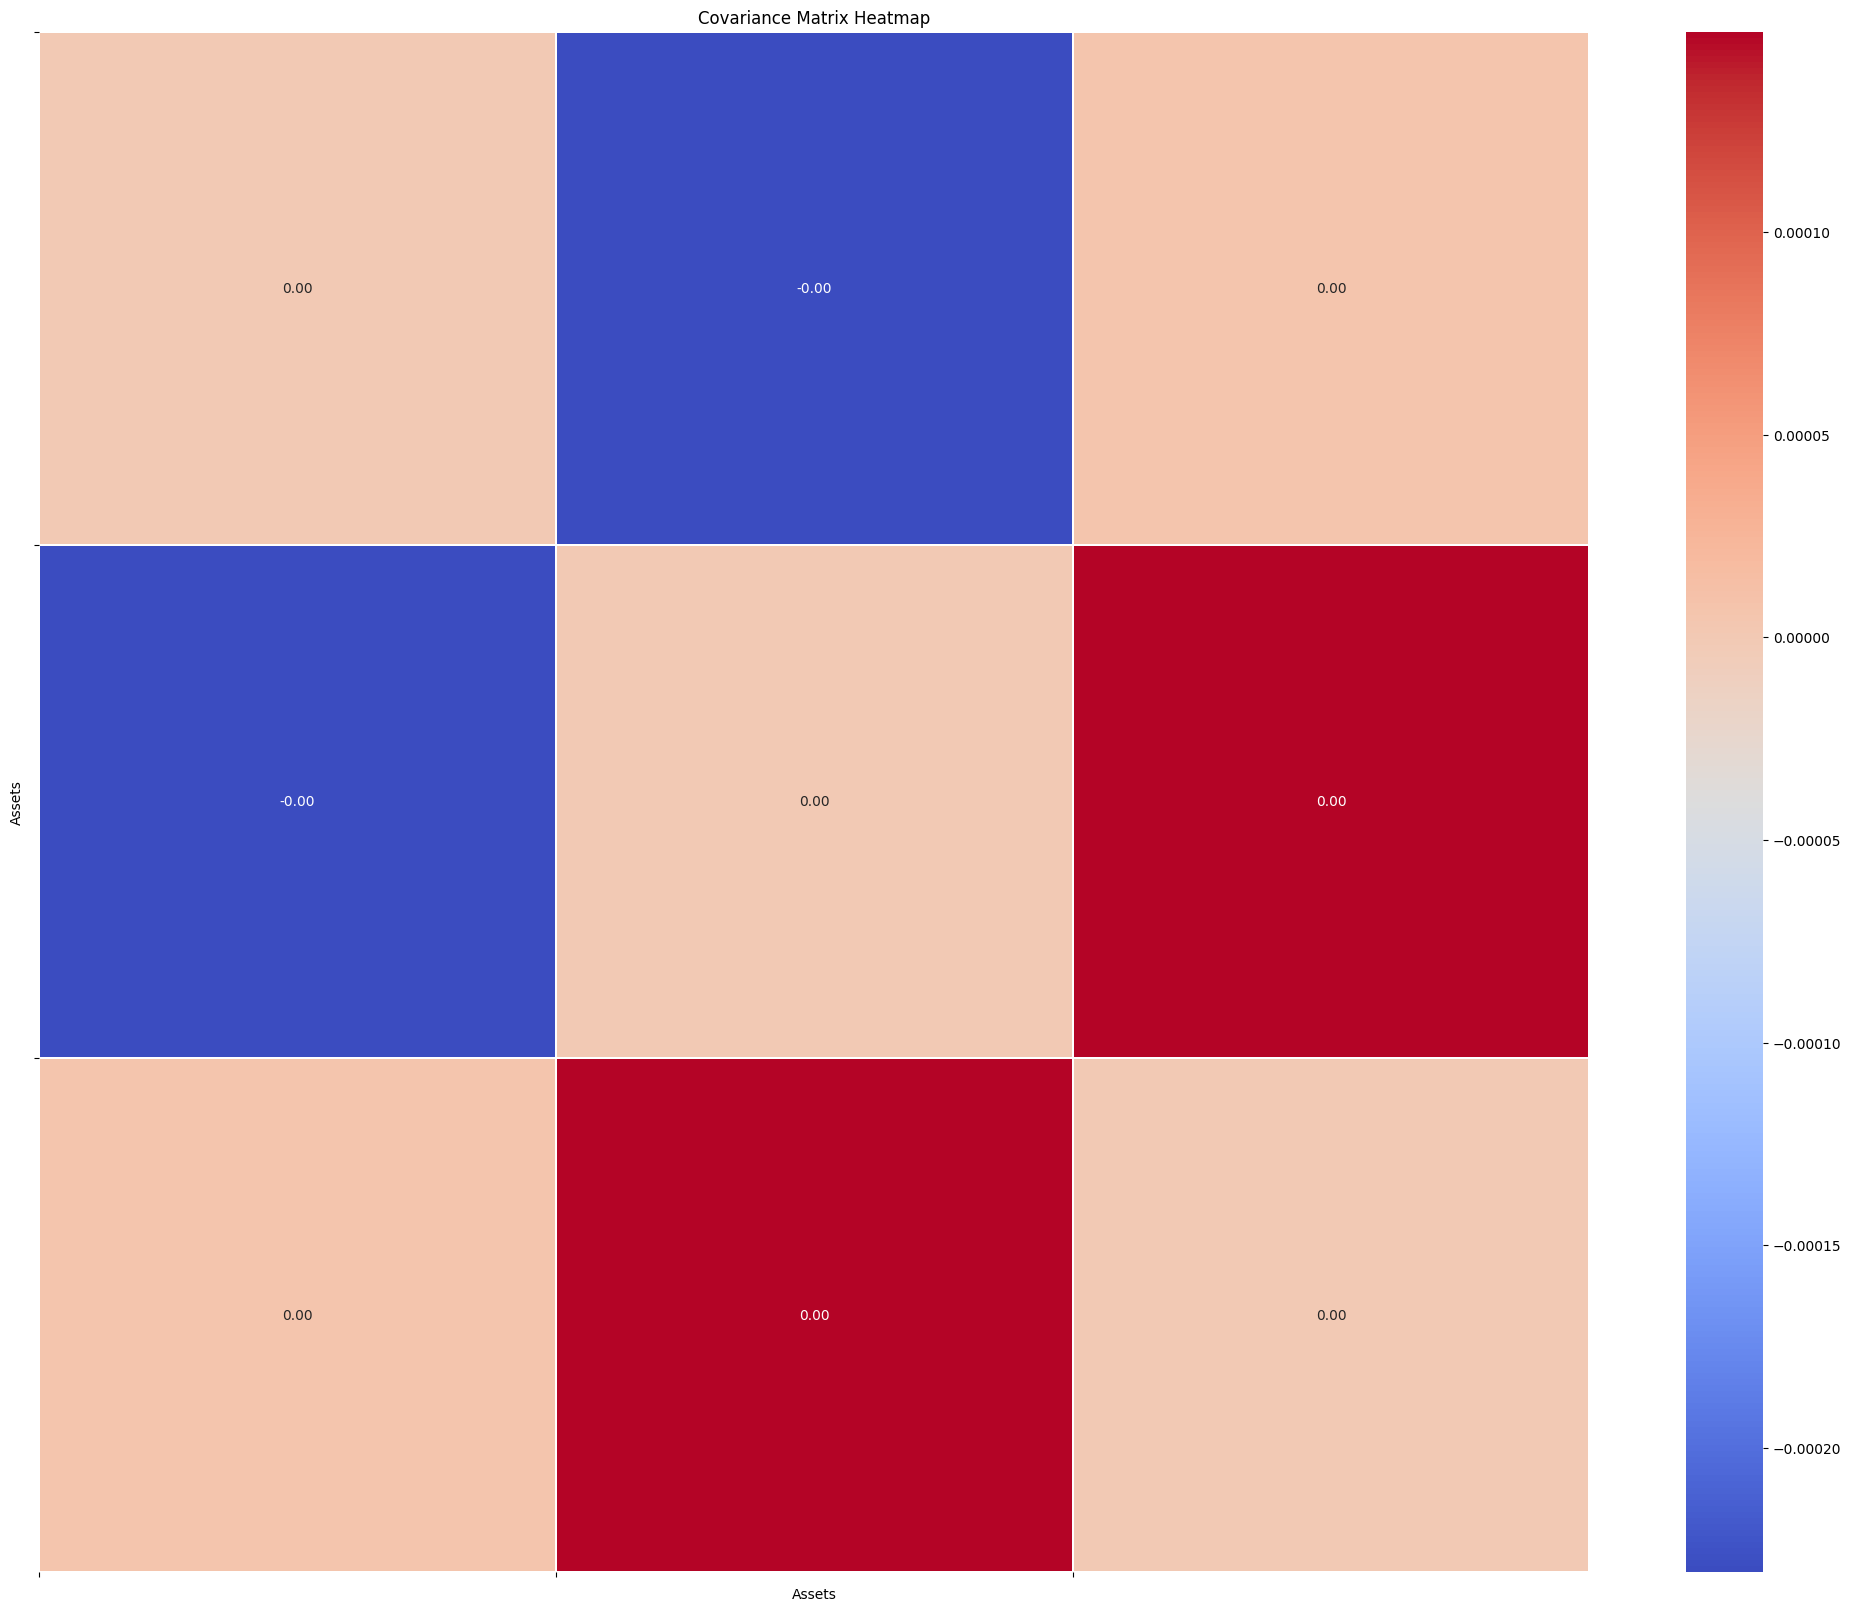

In [56]:
if isinstance(covar_matrix, np.ndarray):
    covar_matrix = pd.DataFrame(covar_matrix, index=PSE_log_returns.columns, columns=PSE_log_returns.columns)

covar_matrix.fillna(0, inplace=True)

plt.figure(figsize=(25, 20))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.005)
plt.title("Covariance Matrix Heatmap")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.xticks(range(0, 3, 1))
plt.yticks(range(0, 3, 1))
plt.show()